In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("data\step1.csv")

In [3]:
df.head()

,Unnamed: 0,LEVEL,POSITION,TECH_STACK,EXPERIENCE,GENDER,COMPANY,COMPANY_SIZE,WORK_TYPE,CITY,CURRENCY,SALARY_FOR_OTHER_CURRENCY,SALARY_FOR_TL_CURRENCY,MIN_TL,MAX_TL,CUR_MIN,CUR_MAX
0,0,Middle,BACK-END DEVELOPER,Php,3 - 5 Yıl,Erkek,Startup,25 - 50 Kişi,Hibrit,İstanbul,₺ - Türk Lirası,NaN,15.000 TL - 15.999 TL,15000.0,15999.0,0.0,0.0
1,1,Junior,FRONT-END DEVELOPER,React,0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit,İstanbul,₺ - Türk Lirası,NaN,8.000 TL - 8.999 TL,8000.0,8999.0,0.0,0.0
2,2,Middle,BACK-END DEVELOPER,.Net,1 - 3 Yıl,Erkek,Outsource,10 - 25 Kişi,Remote,İstanbul,₺ - Türk Lirası,NaN,15.000 TL - 15.999 TL,15000.0,15999.0,0.0,0.0
3,3,Junior,FULL STACK DEVELOPER,"Java, JavaScript | Html | Css, React, React Na...",1 - 3 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit,İstanbul,₺ - Türk Lirası,NaN,10.000 TL - 10.999 TL,10000.0,10999.0,0.0,0.0
4,4,Junior,BACK-END DEVELOPER,".Net, JavaScript | Html | Css",0 - 1 Yıl,Erkek,Kurumsal,250+,Geçici Hibrit,Kocaeli,₺ - Türk Lirası,NaN,5.000 TL - 5.999 TL,5000.0,5999.0,0.0,0.0


In [4]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat


In [5]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df)

Observations: 5026
Variables: 17
cat_cols: 11
num_cols: 3
cat_but_car: 3
num_but_cat: 2


In [6]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe) #gorsellestirmek istiyorsak yukarıdaki "plot=False"u True yaparız
        plt.show()

        LEVEL      Ratio
Senior   2117  42.120971
Middle   1623  32.292081
Junior   1286  25.586948
##########################################


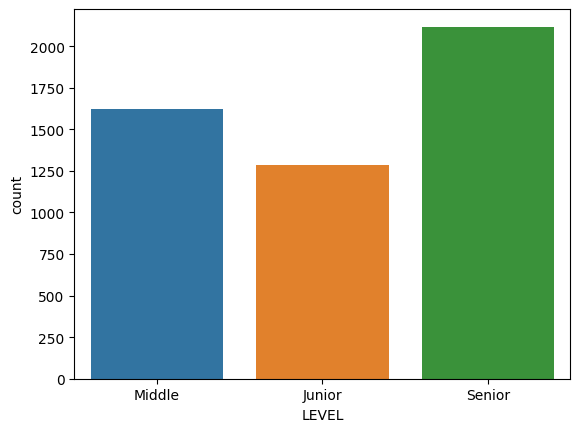

                                POSITION      Ratio
FULL STACK DEVELOPER                1441  28.670911
BACK-END DEVELOPER                  1290  25.666534
FRONT-END DEVELOPER                  576  11.460406
MOBILE APPLICATION DEVELOPER         453   9.013132
TEAM / TECH LEAD                     296   5.889375
DATA SCIENTIST                       150   2.984481
SOFTWARE DEVELOPMENT MANAGER         149   2.964584
SOFTWARE ARCHITECT                   126   2.506964
EMBEDDED SOFTWARE DEVELOPER          118   2.347791
DEVOPS ENGINEER                       96   1.910068
QA / TEST AUTOMATION DEVELOPER        95   1.890171
GAME DEVELOPER                        89   1.770792
OTHERS                                63   1.253482
CTO                                   51   1.014723
DATABASE ADMIN                        33   0.656586
##########################################


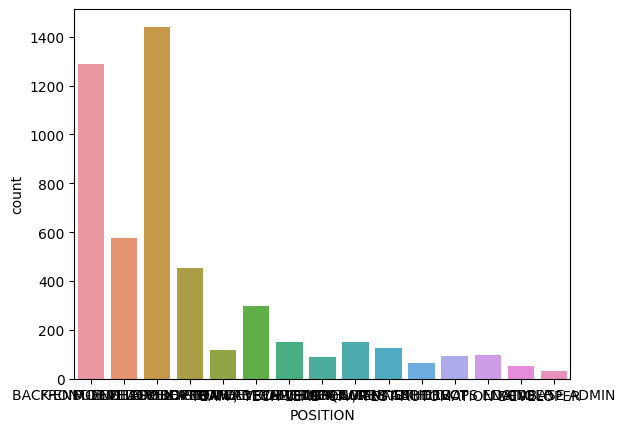

                 EXPERIENCE      Ratio
1 - 3 Yıl              1201  23.895742
3 - 5 Yıl               900  17.906884
0 - 1 Yıl               746  14.842817
7 - 10 Yıl              624  12.415440
5 - 7 Yıl               617  12.276164
10 - 14 Yıl             596  11.858337
15 Yıl ve üzeri         342   6.804616
##########################################


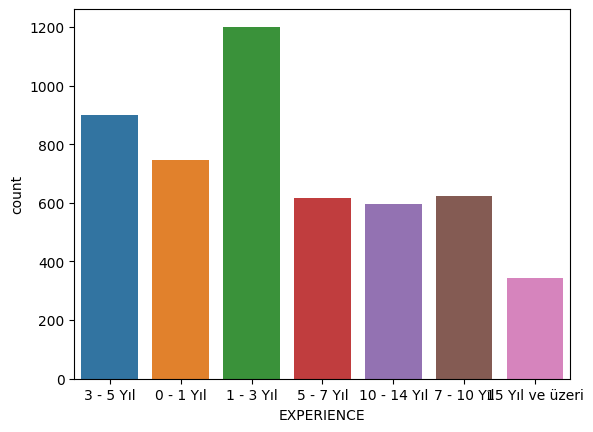

       GENDER      Ratio
Erkek    4493  89.395145
Kadın     533  10.604855
##########################################


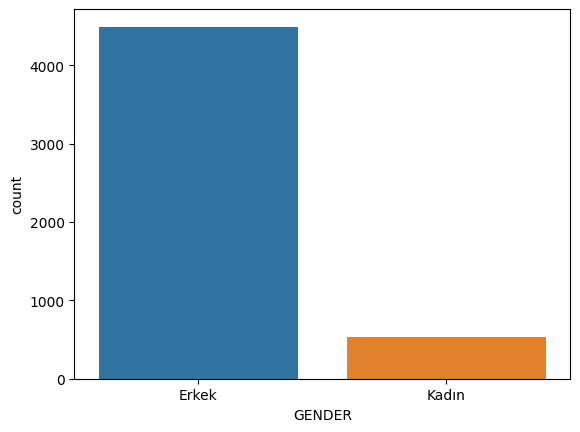

                         COMPANY      Ratio
Kurumsal                    2463  49.005173
Startup                     1152  22.920812
E-Ticaret                    593  11.798647
Outsource                    370   7.361719
DIGER                        148   2.944688
Dijital / Reklam Ajansı      145   2.884998
Oyun                         104   2.069240
Yazılım & Teknoloji           33   0.656586
Fintech / Finans              18   0.358138
##########################################


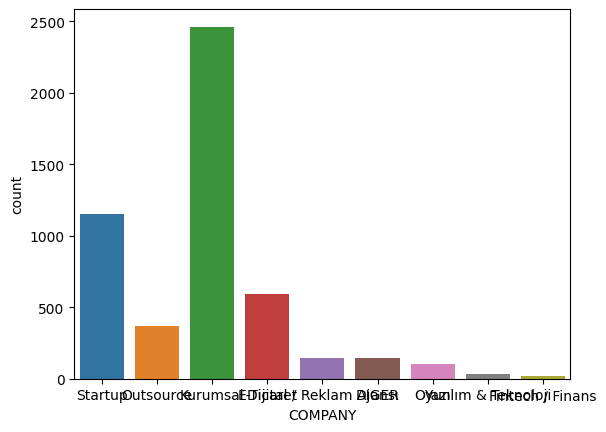

                COMPANY_SIZE      Ratio
250+                    2172  43.215281
1 - 10 Kişi              631  12.554715
10 - 25 Kişi             610  12.136888
100 - 250 Kişi           566  11.261441
50 - 100 Kişi            537  10.684441
25 - 50 Kişi             510  10.147234
##########################################


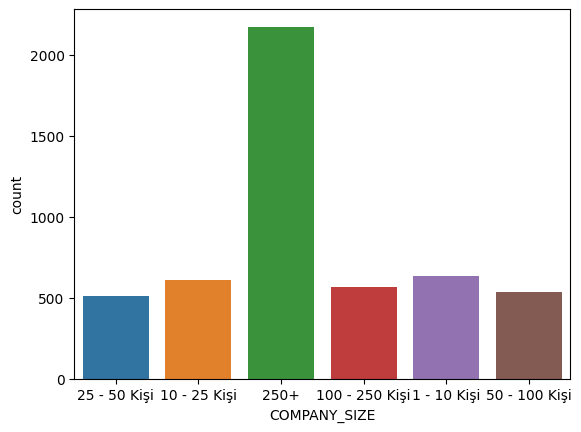

               WORK_TYPE      Ratio
Remote              1957  38.937525
Hibrit              1395  27.755671
Ofis                 803  15.976920
Geçici Remote        547  10.883406
Geçici Hibrit        324   6.446478
##########################################


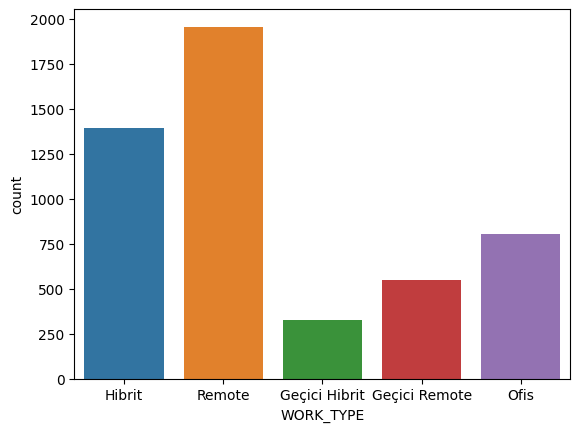

                 CURRENCY      Ratio
₺ - Türk Lirası      4493  89.395145
$ - Dolar             287   5.710306
€ - Euro              199   3.959411
£ - Sterlin            47   0.935137
##########################################


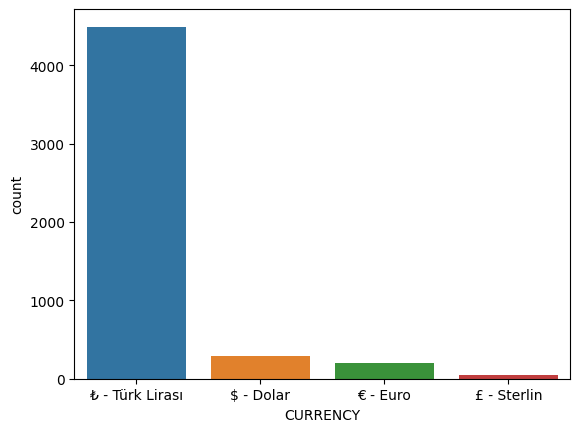

                 SALARY_FOR_OTHER_CURRENCY     Ratio
2.000 - 2.999                          139  2.765619
3.000 - 3.999                          120  2.387585
4.000 - 4.999                           67  1.333068
10.000 ve üzeri                         62  1.233585
5.000 - 5.999                           38  0.756068
1000 - 1.999                            31  0.616793
1.000 - 1.999                           20  0.397931
7.000 - 7.999                           19  0.378034
6.000 - 6.999                           18  0.358138
8.000 - 8.999                           15  0.298448
9.000 - 9.999                            4  0.079586
##########################################


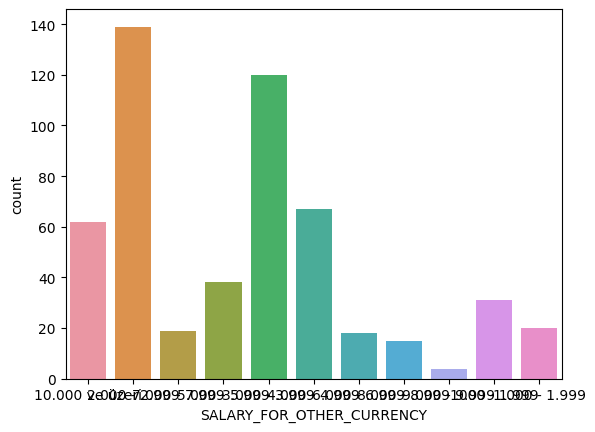

         CUR_MIN      Ratio
0.0         4493  89.395145
2000.0       139   2.765619
3000.0       120   2.387585
4000.0        67   1.333068
10000.0       62   1.233585
1000.0        51   1.014723
5000.0        38   0.756068
7000.0        19   0.378034
6000.0        18   0.358138
8000.0        15   0.298448
9000.0         4   0.079586
##########################################


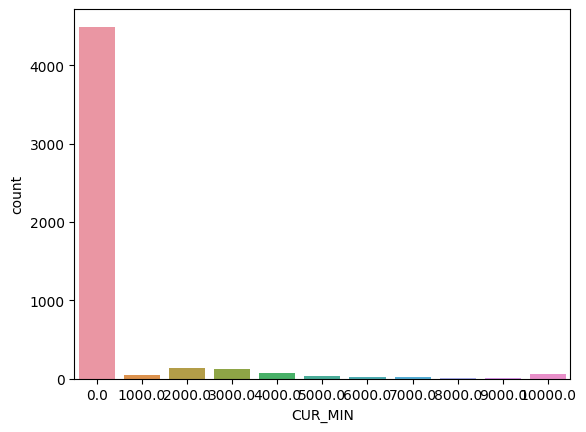

         CUR_MAX      Ratio
0.0         4493  89.395145
2999.0       139   2.765619
3999.0       120   2.387585
4999.0        67   1.333068
10999.0       62   1.233585
1999.0        51   1.014723
5999.0        38   0.756068
7999.0        19   0.378034
6999.0        18   0.358138
8999.0        15   0.298448
9999.0         4   0.079586
##########################################


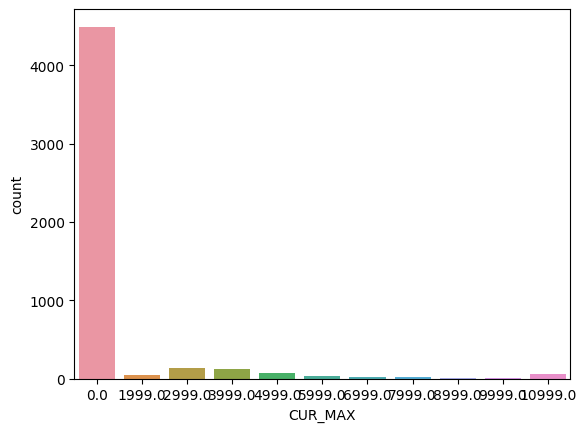

In [7]:
for col in cat_cols:
    cat_summary(df, col)

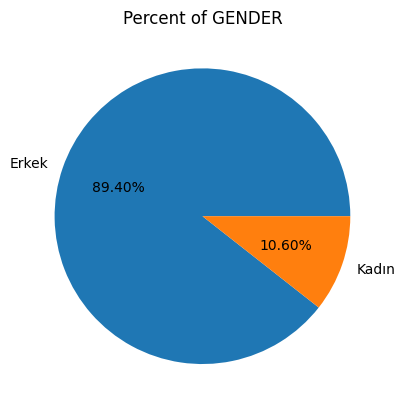

In [8]:
#GENDER daire grafigi yüzdelik
labels = ("Erkek", "Kadın")
sizes = [4497/5030, 533/5030]
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Percent of GENDER")
plt.show()

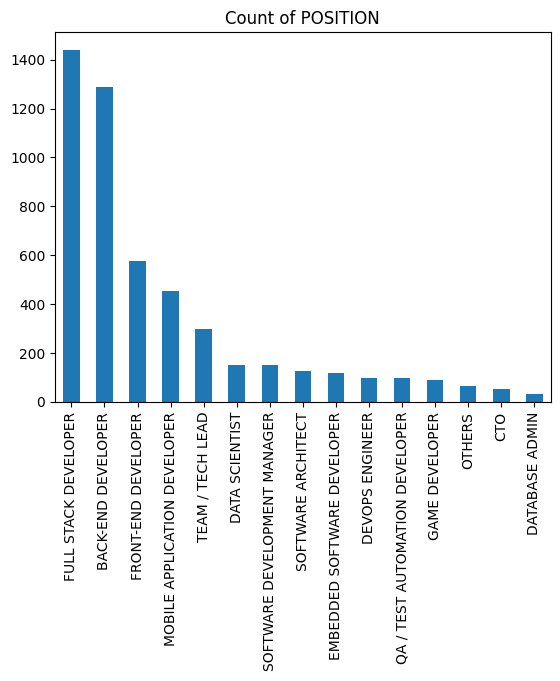

In [9]:
#POSİTION SAYILARININ DAĞILIMI

df["POSITION"].value_counts().plot(kind='bar')
plt.title("Count of POSITION")
plt.show(block=True)


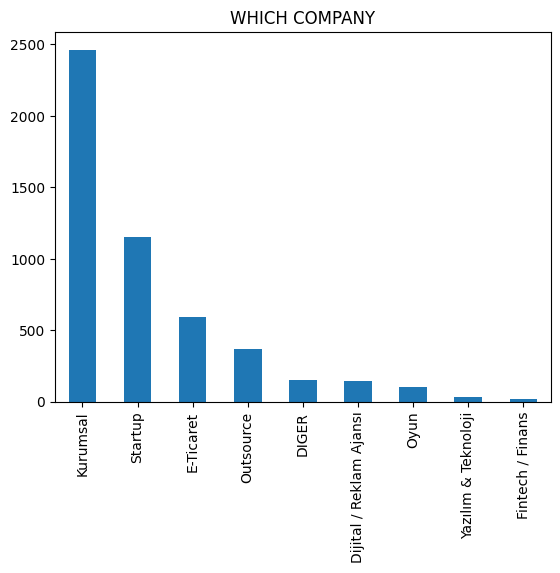

In [16]:
df["COMPANY"].value_counts().plot(kind="bar")
plt.title("WHICH COMPANY")
plt.show(block=True)

In [10]:
#WORK_TYPE LEVEL KIRILIMINDA DEĞERLERİ
df.groupby(["WORK_TYPE", "LEVEL"]).agg({"LEVEL": "count"})

LEVEL
WORK_TYPE     LEVEL        
Geçici Hibrit Junior     73
              Middle    111
              Senior    140
Geçici Remote Junior    132
              Middle    186
              Senior    229
Hibrit        Junior    349
              Middle    398
              Senior    648
Ofis          Junior    276
              Middle    284
              Senior    243
Remote        Junior    456
              Middle    644
              Senior    857

In [11]:
#POZİSYONLARIN CİNSİYET KIRILIMINDA DEĞERLERİ
df.groupby(["POSITION", "GENDER"]).agg({"POSITION": "count"})

POSITION
POSITION                       GENDER          
BACK-END DEVELOPER             Erkek       1153
                               Kadın        137
CTO                            Erkek         49
                               Kadın          2
DATA SCIENTIST                 Erkek        120
                               Kadın         30
DATABASE ADMIN                 Erkek         28
                               Kadın          5
DEVOPS ENGINEER                Erkek         84
                               Kadın         12
EMBEDDED SOFTWARE DEVELOPER    Erkek        111
                               Kadın          7
FRONT-END DEVELOPER            Erkek        505
                               Kadın         71
FULL STACK DEVELOPER           Erkek       1280
                               Kadın        161
GAME DEVELOPER                 Erkek         86
                               Kadın          3
MOBILE APPLICATION DEVELOPER   Erkek        417
                               Kadın         36
OTHERS                         Erkek         49
                               Kadın         14
QA / TEST AUTOMATION DEVELOPER Erkek         64
                               Kadın         31
SOFTWARE ARCHITECT             Erkek        119
                               Kadın          7
SOFTWARE DEVELOPMENT MANAGER   Erkek        142
                               Kadın          7
TEAM / TECH LEAD               Erkek        286
                               Kadın         10

In [12]:
#POZİSYONLARIN LEVEL KIRILIMINDA MIN MAX MAAŞLAR VE POZİSYONDA ÇALIŞAN SAYISI
df.groupby(["POSITION","LEVEL"]).agg({"MIN_TL": "mean", "MAX_TL": "mean","POSITION":"count"})

MIN_TL         MAX_TL  POSITION
POSITION                       LEVEL                                         
BACK-END DEVELOPER             Junior   10625.507692   12526.896708       325
                               Middle   19871.769723   22712.849062       469
                               Senior   29493.991935   33316.596996       496
CTO                            Junior  225600.000000  248137.440000         1
                               Middle   24000.000000   24999.000000         1
                               Senior   56527.551020   62690.566531        49
DATA SCIENTIST                 Junior   17391.500000   20193.695000        60
                               Middle   18435.200000   20569.463600        50
                               Senior   34157.000000   37574.828750        40
DATABASE ADMIN                 Junior    7000.000000    7999.000000        10
                               Middle   10083.333333   11082.333333        12
                               Senior   27577.272727   30253.684545        11
DEVOPS ENGINEER                Junior    9789.428571   11291.639143        35
                               Middle   18962.333333   22952.672333        30
                               Senior   31716.451613   36178.436774        31
EMBEDDED SOFTWARE DEVELOPER    Junior   13102.380952   14520.723095        42
                               Middle   13333.333333   14332.333333        36
                               Senior   37101.500000   42547.548750        40
FRONT-END DEVELOPER            Junior   10104.976077   11852.031148       209
                               Middle   19860.092166   23446.133871       217
                               Senior   31911.133333   36402.171267       150
FULL STACK DEVELOPER           Junior   11468.637771   13512.536130       323
                               Middle   16982.173913   19398.620832       529
                               Senior   26324.991511   29469.280458       589
GAME DEVELOPER                 Junior   16369.411765   18669.168824        34
                               Middle   27606.250000   32633.093125        32
                               Senior   39823.478261   46460.314783        23
MOBILE APPLICATION DEVELOPER   Junior   13224.156627   15146.389157       166
                               Middle   21551.273885   24977.462102       157
                               Senior   31025.538462   34955.374231       130
OTHERS                         Junior   18280.526316   21177.626316        19
                               Middle   17310.000000   19147.705909        22
                               Senior   40722.272727   44979.375909        22
QA / TEST AUTOMATION DEVELOPER Junior   15274.222222   17447.380222        45
                               Middle   26980.789474   30297.206579        38
                               Senior   41946.666667   49026.246667        12
SOFTWARE ARCHITECT             Junior    8285.714286    9284.714286         7
                               Middle   21648.333333   25582.728333         6
                               Senior   36047.699115   39527.136814       113
SOFTWARE DEVELOPMENT MANAGER   Junior   26315.000000   33967.342500         4
                               Middle   25222.222222   26221.222222         9
                               Senior   37350.735294   40811.536691       136
TEAM / TECH LEAD               Junior   44266.666667   48855.406667         6
                               Middle   29212.666667   32559.982667        15
                               Senior   35446.181818   39451.009636       275

In [13]:
#LEVEL IN WORK_TYPE KIRILIMINDA MIN MAX DEĞERLERİ VE SAYILARI
df.groupby(["LEVEL","WORK_TYPE"]).agg({"MIN_TL": "mean", "MAX_TL": "mean","WORK_TYPE":"count"})

MIN_TL        MAX_TL  WORK_TYPE
LEVEL  WORK_TYPE                                           
Junior Geçici Hibrit  11050.684932  12555.206301         73
       Geçici Remote  11300.833333  13445.807424        132
       Hibrit         13488.080229  15472.598052        349
       Ofis            9534.456522  10894.254819        276
       Remote         13332.587719  15767.803640        456
Middle Geçici Hibrit  18263.063063  20070.533063        111
       Geçici Remote  18457.311828  20843.686505        186
       Hibrit         20576.934673  23560.405503        398
       Ofis           12265.704225  13724.455282        284
       Remote         21837.701863  25511.834627        644
Senior Geçici Hibrit  28894.642857  31518.302500        140
       Geçici Remote  28057.772926  30630.001747        229
       Hibrit         31921.604938  35641.199722        648
       Ofis           22143.950617  24203.288724        243
       Remote         35636.522754  40521.236651        857